# __Projekt Herzkrankheiten__

Projektarbeit des Moduls 2PythGr von Kai Beerli, Christian Felzen und Pierluigi Margarito

## __Inhaltsverzeichnis__
1. [Kontext](#Kontext)
2. [Bibliothek laden](#Bibliotheken-laden)
3. [Explorative Datenanalyse (EDA)](#Explorative-Datenanalyse-(EDA))
4. [Unifying & Transformation](#Unifying-&-Transformation)
5. [Data Cleansing](#Data-Cleansing)
6. [Analysis & Validation](#Analysis-&-Validation)
7. [Feature Selection & Engineering](#Feature-Selection-&-Engineering)
8. [Anwendung in Machine Learning](#Anwendung-in-Machine-Learning)

## __Kontext__

## __Bibliothek laden__

In [1]:
# Load the libraries
import os
# Basics
import pandas as pd
import numpy as np
#from IPython.display import display
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from seaborn import color_palette
from sklearn.preprocessing import StandardScaler
import plotly.express as ex
from IPython.display import Image
from sklearn.decomposition import PCA

# ML Models
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss 

# XAI Methods
import shap
import lime
import lime.lime_tabular

# Javascript-based dynamical visualization
shap.initjs()


## __Explorative Datenanalyse (EDA)__

In [2]:
# loading data
os.chdir("C:/Users\kaibe/OneDrive - ZHAW/Semester 8/Python Grundlagen und Anwendung in Data Science/Projekt/heart_2020_cleaned")
os.getcwd()

Health_Data = pd.read_csv("heart_2020_cleaned.csv", sep=",")
Health_Data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


## __Unifying & Transformation__

In [3]:
df_HD_adjusted = pd.DataFrame(Health_Data)

In [4]:
df_HD_adjusted["HeartDisease"] = df_HD_adjusted["HeartDisease"].astype('category')
df_HD_adjusted["Smoking"] = df_HD_adjusted["Smoking"].astype('category')
df_HD_adjusted["AlcoholDrinking"] = df_HD_adjusted["AlcoholDrinking"].astype('category')
df_HD_adjusted["Stroke"] = df_HD_adjusted["Stroke"].astype('category')
df_HD_adjusted["DiffWalking"] = df_HD_adjusted["DiffWalking"].astype('category')
df_HD_adjusted["Sex"] = df_HD_adjusted["Sex"].astype('category')
df_HD_adjusted["AgeCategory"] = df_HD_adjusted["AgeCategory"].astype('category')
df_HD_adjusted["Race"] = df_HD_adjusted["Race"].astype('category')
df_HD_adjusted["Diabetic"] = df_HD_adjusted["Diabetic"].astype('category')
df_HD_adjusted["PhysicalActivity"] = df_HD_adjusted["PhysicalActivity"].astype('category')
df_HD_adjusted["GenHealth"] = df_HD_adjusted["GenHealth"].astype('category')
df_HD_adjusted["Asthma"] = df_HD_adjusted["Asthma"].astype('category')
df_HD_adjusted["KidneyDisease"] = df_HD_adjusted["KidneyDisease"].astype('category')
df_HD_adjusted["SkinCancer"] = df_HD_adjusted["SkinCancer"].astype('category')

In [5]:
df_HD_adjusted["HeartDisease"] = df_HD_adjusted["HeartDisease"].cat.codes
df_HD_adjusted["Smoking"] = df_HD_adjusted["Smoking"].cat.codes
df_HD_adjusted["AlcoholDrinking"] = df_HD_adjusted["AlcoholDrinking"].cat.codes
df_HD_adjusted["Stroke"] = df_HD_adjusted["Stroke"].cat.codes
df_HD_adjusted["DiffWalking"] = df_HD_adjusted["DiffWalking"].cat.codes
df_HD_adjusted["Sex"] = df_HD_adjusted["Sex"].cat.codes
df_HD_adjusted["AgeCategory"] = df_HD_adjusted["AgeCategory"].cat.codes
df_HD_adjusted["Race"] = df_HD_adjusted["Race"].cat.codes
df_HD_adjusted["Diabetic"] = df_HD_adjusted["Diabetic"].cat.codes
df_HD_adjusted["PhysicalActivity"] = df_HD_adjusted["PhysicalActivity"].cat.codes
df_HD_adjusted["GenHealth"] = df_HD_adjusted["GenHealth"].cat.codes
df_HD_adjusted["Asthma"] = df_HD_adjusted["Asthma"].cat.codes
df_HD_adjusted["KidneyDisease"] = df_HD_adjusted["KidneyDisease"].cat.codes
df_HD_adjusted["SkinCancer"] = df_HD_adjusted["SkinCancer"].cat.codes

In [6]:
df_HD_adjusted.isna()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df_HD_adjusted = df_HD_adjusted.dropna()

In [8]:
df_HD_adjusted.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


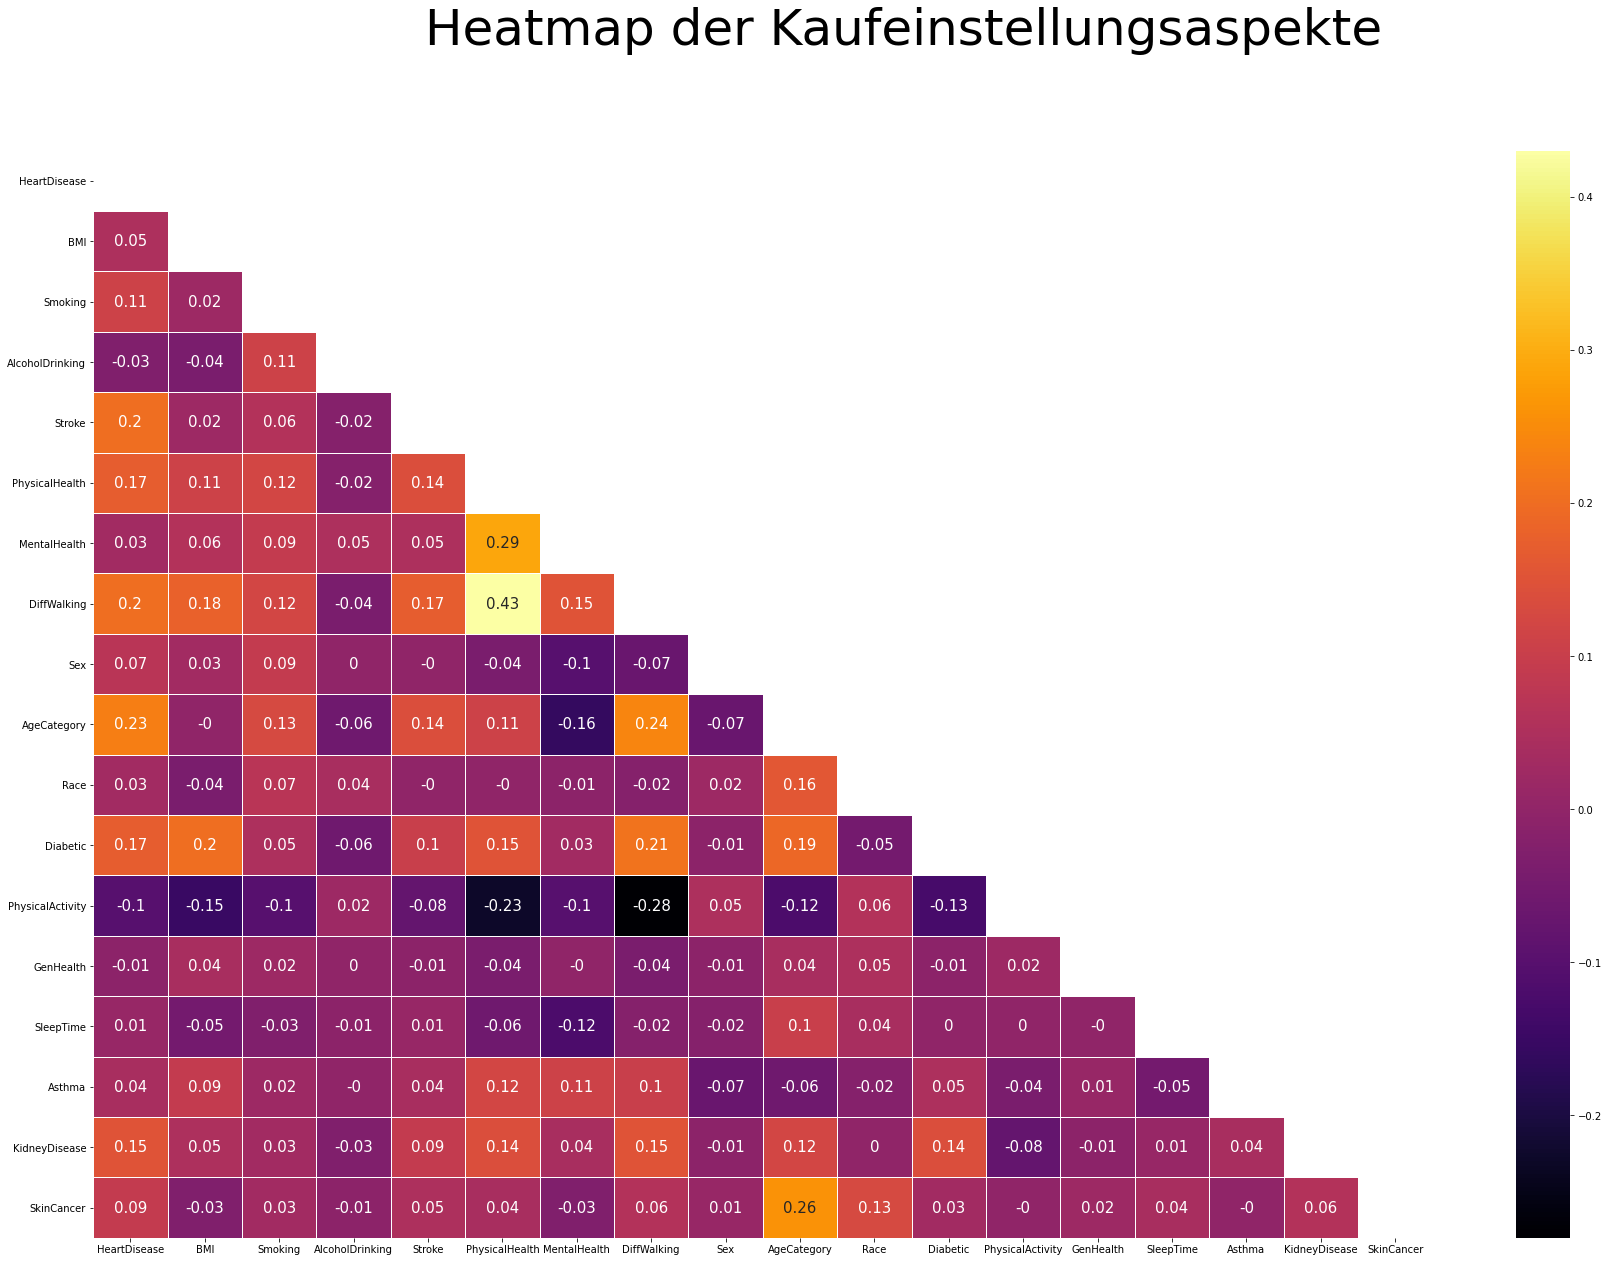

In [9]:
# Heatmap von allen einzelnen Aspekten der Kaufeinstellungen
df_heatmap = df_HD_adjusted.corr().round(2)
f, ax = plt.subplots(figsize=(30, 20))
mask = np.triu(np.ones_like(df_heatmap, dtype=bool))
sns.heatmap(df_heatmap, annot=True, annot_kws={'size': 15}, linewidths=.5, mask=mask, cmap="inferno")

f.suptitle('Heatmap der Kaufeinstellungsaspekte').set_size(50)

## __Data Cleansing__

## __Analysis & Validation__

## __Feature Selection & Engineering__

## __Anwendung in Machine Learning__